In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


from ydata_profiling import ProfileReport
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.utils import resample 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE, SelectKBest,f_classif
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score,roc_curve

<b>Loading Datasets 

In [2]:
normal = pd.read_csv("Data_of_Attack_Back_Normal.csv")
back = pd.read_csv('Data_of_Attack_Back.csv')
buffer = pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
FTP = pd.read_csv('Data_of_Attack_Back_FTPWrite.csv',header=None) 
passw = pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
nept = pd.read_csv('Data_of_Attack_Back_Neptune.csv')
nmap = pd.read_csv('Data_of_Attack_Back_NMap.csv')
port = pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
root= pd.read_csv('Data_of_Attack_Back_RootKit.csv')
satan = pd.read_csv('Data_of_Attack_Back_Satan.csv')
smurf = pd.read_csv('Data_of_Attack_Back_Smurf.csv')

In [3]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [4]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576710 entries, 0 to 576709
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      576710 non-null  float64
 1    protocol_type                576710 non-null  float64
 2    service                      576710 non-null  float64
 3    flag                         576710 non-null  float64
 4    src_bytes                    576710 non-null  float64
 5    dst_bytes                    576710 non-null  float64
 6    land                         576710 non-null  int64  
 7    wrong_fragment               576710 non-null  int64  
 8    urgent                       576710 non-null  float64
 9    hot                          576710 non-null  float64
 10   num_failed_logins            576710 non-null  float64
 11   logged_in                    576710 non-null  float64
 12   num_compromised              576710 non-nul

In [5]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.001,0.002,0.0,0.0,0.0,0.050,0.1,0.0,0.100,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.002,0.003,0.0,0.0,0.0,0.033,0.1,0.0,0.067,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.003,0.004,0.0,0.0,0.0,0.025,0.1,0.0,0.050,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


In [6]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      968 non-null    float64
 1    protocol_type                968 non-null    int64  
 2    service                      968 non-null    int64  
 3    flag                         968 non-null    float64
 4    src_bytes                    968 non-null    float64
 5    dst_bytes                    968 non-null    float64
 6    land                         968 non-null    int64  
 7    wrong_fragment               968 non-null    int64  
 8    urgent                       968 non-null    int64  
 9    hot                          968 non-null    float64
 10   num_failed_logins            968 non-null    int64  
 11   logged_in                    968 non-null    float64
 12   num_compromised              968 non-null    float64
 13   root

In [7]:
buffer.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,0,0.1,0.2,0.1,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,0,0.1,0.2,0.1,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,0,0.1,0.3,0.0,0,0.1,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,0,0.1,0.1,0.1,0,0.0,0.0,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,0,0.1,0.4,0.1,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0.0,0,0.0,0.0,0.1,0.0,0,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0


In [8]:
buffer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      30 non-null     float64
 1    protocol_type                30 non-null     int64  
 2    service                      30 non-null     float64
 3    flag                         30 non-null     float64
 4    src_bytes                    30 non-null     float64
 5    dst_bytes                    30 non-null     float64
 6    land                         30 non-null     int64  
 7    wrong_fragment               30 non-null     int64  
 8    urgent                       30 non-null     int64  
 9    hot                          30 non-null     float64
 10   num_failed_logins            30 non-null     int64  
 11   logged_in                    30 non-null     float64
 12   num_compromised              30 non-null     float64
 13   root_s

In [9]:
FTP.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,0,0.1,0.0,0,0,0.0,0.1,0,0.1,0,0,0.1,0.001,0.001,0,0,0,0,0.1,0,0.0,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,0,0.1,0.1,0,0,0.1,0.0,0,0.1,0,0,0.0,0.001,0.001,0,0,0,0,0.1,0,0.0,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
2,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,0,0.1,0.0,0,0,0.1,0.0,0,0.0,0,0,0.0,0.001,0.002,0,0,0,0,0.1,0,0.1,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,0,0.1,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.001,0.001,0,0,0,0,0.1,0,0.0,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
4,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,0,0.1,0.0,0,0,0.0,0.1,0,0.1,0,0,0.1,0.001,0.001,0,0,0,0,0.1,0,0.0,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0


In [10]:
FTP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8 non-null      float64
 1   1       8 non-null      int64  
 2   2       8 non-null      float64
 3   3       8 non-null      int64  
 4   4       8 non-null      float64
 5   5       8 non-null      float64
 6   6       8 non-null      int64  
 7   7       8 non-null      int64  
 8   8       8 non-null      float64
 9   9       8 non-null      float64
 10  10      8 non-null      int64  
 11  11      8 non-null      float64
 12  12      8 non-null      float64
 13  13      8 non-null      int64  
 14  14      8 non-null      int64  
 15  15      8 non-null      float64
 16  16      8 non-null      float64
 17  17      8 non-null      int64  
 18  18      8 non-null      float64
 19  19      8 non-null      int64  
 20  20      8 non-null      int64  
 21  21      8 non-null      float64
 22  22    

In [11]:
passw.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0,0.0,0.001,0.001,0.00,0.00,0.00,0.00,0.1,0,0,0.001,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,0.1,0.0,0,0,0,0,0,0,0,0,0,0.0,0.001,0.001,0.10,0.10,0.00,0.00,0.1,0,0,0.001,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,0.1,0.0,0,0,0,0,0,0,0,0,0,0.0,0.002,0.002,0.05,0.05,0.05,0.05,0.1,0,0,0.002,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,0.1,0.0,0,0,0,0,0,0,0,0,0,0.0,0.002,0.002,0.00,0.00,0.10,0.10,0.1,0,0,0.003,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,0.1,0.0,0,0,0,0,0,0,0,0,0,0.0,0.001,0.001,0.00,0.00,0.10,0.10,0.1,0,0,0.004,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075


In [12]:
passw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      53 non-null     float64
 1    protocol_type                53 non-null     int64  
 2    service                      53 non-null     float64
 3    flag                         53 non-null     float64
 4    src_bytes                    53 non-null     float64
 5    dst_bytes                    53 non-null     float64
 6    land                         53 non-null     int64  
 7    wrong_fragment               53 non-null     int64  
 8    urgent                       53 non-null     int64  
 9    hot                          53 non-null     float64
 10   num_failed_logins            53 non-null     float64
 11   logged_in                    53 non-null     float64
 12   num_compromised              53 non-null     int64  
 13   root_s

In [13]:
nept.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.002,0.001,0.050,0.1,0.0,0.0,0.050,0.100,0.0,0.001,0.002,0.1,0.0,0.100,0.100,0.1,0.050,0.0,0.0
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.003,0.002,0.067,0.1,0.0,0.0,0.067,0.067,0.0,0.002,0.003,0.1,0.0,0.050,0.067,0.1,0.067,0.0,0.0
2,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.004,0.003,0.075,0.1,0.0,0.0,0.075,0.050,0.0,0.003,0.004,0.1,0.0,0.033,0.050,0.1,0.075,0.0,0.0
3,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.005,0.004,0.080,0.1,0.0,0.0,0.080,0.040,0.0,0.004,0.005,0.1,0.0,0.025,0.040,0.1,0.080,0.0,0.0
4,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.006,0.005,0.083,0.1,0.0,0.0,0.083,0.033,0.0,0.005,0.006,0.1,0.0,0.020,0.033,0.1,0.083,0.0,0.0


In [14]:
nept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227228 entries, 0 to 227227
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      227228 non-null  float64
 1    protocol_type                227228 non-null  int64  
 2    service                      227228 non-null  float64
 3    flag                         227228 non-null  float64
 4    src_bytes                    227228 non-null  float64
 5    dst_bytes                    227228 non-null  float64
 6    land                         227228 non-null  int64  
 7    wrong_fragment               227228 non-null  int64  
 8    urgent                       227228 non-null  int64  
 9    hot                          227228 non-null  int64  
 10   num_failed_logins            227228 non-null  int64  
 11   logged_in                    227228 non-null  float64
 12   num_compromised              227228 non-nul

In [15]:
nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.005,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.006,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0,0,0.1,0.0,0.0,0.007,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0


In [16]:
nmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1554 non-null   int64  
 1    protocol_type                1554 non-null   float64
 2    service                      1554 non-null   float64
 3    flag                         1554 non-null   float64
 4    src_bytes                    1554 non-null   float64
 5    dst_bytes                    1554 non-null   float64
 6    land                         1554 non-null   int64  
 7    wrong_fragment               1554 non-null   int64  
 8    urgent                       1554 non-null   int64  
 9    hot                          1554 non-null   int64  
 10   num_failed_logins            1554 non-null   int64  
 11   logged_in                    1554 non-null   int64  
 12   num_compromised              1554 non-null   int64  
 13   ro

In [17]:
port.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.0,0.0,0.1,0.1,0.100,0.000,0.0,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.002,0.002,0.0,0.0,0.1,0.1,0.100,0.000,0.0,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.003,0.001,0.0,0.0,0.1,0.1,0.033,0.067,0.0,0.173,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.004,0.002,0.0,0.0,0.1,0.1,0.050,0.050,0.0,0.174,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.005,0.001,0.0,0.0,0.1,0.1,0.020,0.060,0.0,0.175,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100


In [18]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      2964 non-null   float64
 1    protocol_type                2964 non-null   float64
 2    service                      2964 non-null   float64
 3    flag                         2964 non-null   float64
 4    src_bytes                    2964 non-null   float64
 5    dst_bytes                    2964 non-null   float64
 6    land                         2964 non-null   int64  
 7    wrong_fragment               2964 non-null   int64  
 8    urgent                       2964 non-null   int64  
 9    hot                          2964 non-null   float64
 10   num_failed_logins            2964 non-null   int64  
 11   logged_in                    2964 non-null   float64
 12   num_compromised              2964 non-null   int64  
 13   ro

In [19]:
root.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,0.1,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,0.0,0.1,0.6,0.0,0,0.7,0.0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,0.0,0.1,0.0,0.0,0,0.0,0.1,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,0.0,0.1,0.5,0.1,0,1.0,0.1,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.255,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0


In [20]:
root.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      10 non-null     float64
 1    protocol_type                10 non-null     float64
 2    service                      10 non-null     float64
 3    flag                         10 non-null     int64  
 4    src_bytes                    10 non-null     float64
 5    dst_bytes                    10 non-null     float64
 6    land                         10 non-null     int64  
 7    wrong_fragment               10 non-null     int64  
 8    urgent                       10 non-null     float64
 9    hot                          10 non-null     float64
 10   num_failed_logins            10 non-null     float64
 11   logged_in                    10 non-null     float64
 12   num_compromised              10 non-null     float64
 13   root_sh

In [21]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.145,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.002,0.001,0.0,0.0,0.0,0.0,0.050,0.100,0.0,0.146,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0,0.0,0.003,0.002,0.0,0.0,0.0,0.0,0.067,0.067,0.0,0.147,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0


In [22]:
satan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      5019 non-null   float64
 1    protocol_type                5019 non-null   float64
 2    service                      5019 non-null   float64
 3    flag                         5019 non-null   float64
 4    src_bytes                    5019 non-null   float64
 5    dst_bytes                    5019 non-null   float64
 6    land                         5019 non-null   int64  
 7    wrong_fragment               5019 non-null   int64  
 8    urgent                       5019 non-null   int64  
 9    hot                          5019 non-null   float64
 10   num_failed_logins            5019 non-null   float64
 11   logged_in                    5019 non-null   float64
 12   num_compromised              5019 non-null   float64
 13   ro

In [23]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.1,0,0,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.315,0.315,0,0,0,0,0.1,0,0,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.316,0.316,0,0,0,0,0.1,0,0,0.148,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.511,0.511,0,0,0,0,0.1,0,0,0.149,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.511,0.511,0,0,0,0,0.1,0,0,0.150,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0


In [24]:
smurf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      3007 non-null   int64  
 1    protocol_type                3007 non-null   float64
 2    service                      3007 non-null   float64
 3    flag                         3007 non-null   int64  
 4    src_bytes                    3007 non-null   float64
 5    dst_bytes                    3007 non-null   int64  
 6    land                         3007 non-null   int64  
 7    wrong_fragment               3007 non-null   float64
 8    urgent                       3007 non-null   int64  
 9    hot                          3007 non-null   int64  
 10   num_failed_logins            3007 non-null   int64  
 11   logged_in                    3007 non-null   int64  
 12   num_compromised              3007 non-null   int64  
 13   ro

### EDA

<b>Renaming FTP columns

In [25]:
FTP.columns = normal.columns

In [26]:
FTP.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

<b>Creating Y variables for Binomial classification (Attack) 

In [27]:
normal['Attack'] = 'normal'
back['Attack'] = 'Attack'
buffer['Attack'] = 'Attack'
FTP['Attack'] = 'Attack'
passw['Attack'] = 'Attack'
nept['Attack'] = 'Attack'
nmap['Attack'] = 'Attack'
port['Attack'] = 'Attack'
root['Attack'] = 'Attack'
satan['Attack'] = 'Attack'
smurf['Attack'] ='Attack'

<b>Appending the Datasets in to single dataset 

In [28]:
data = pd.concat([normal,back,buffer,FTP,passw,nept,nmap,port,root,satan,smurf])

<b>Reseting Index

In [29]:
data = data.reset_index(drop=True)

In [30]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Attack
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Attack


In [31]:
#value counts for Target variable
data.Attack.value_counts(normalize= True)

normal    0.705412
Attack    0.294588
Name: Attack, dtype: float64

In [32]:
data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

<b>Removing unwanted space in columns 

In [33]:
data.columns = data.columns.str.replace(' ','')

In [34]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

<b>Data type manipulation

In [35]:

# Nominal features
nominal_features = ['protocol_type', 'flag','Attack']
data[nominal_features] = data[nominal_features].astype('category')

# Binary features
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
data[binary_features] = data[binary_features].astype('int')

# Numeric features
numeric_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
                    'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations',
                    'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count',
                    'serror_rate', 'srv_error_rate', 'rerror_rate', 'srv_rerror_rate',
                    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                    'dst_host_srv_rerror_rate']

data[numeric_features] = data[numeric_features].astype('float')  # You can choose the appropriate numeric type


In [36]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Attack
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Attack


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     817551 non-null  float64 
 1   protocol_type                817551 non-null  category
 2   service                      817551 non-null  float64 
 3   flag                         817551 non-null  category
 4   src_bytes                    817551 non-null  float64 
 5   dst_bytes                    817551 non-null  float64 
 6   land                         817551 non-null  int32   
 7   wrong_fragment               817551 non-null  float64 
 8   urgent                       817551 non-null  float64 
 9   hot                          817551 non-null  float64 
 10  num_failed_logins            817551 non-null  float64 
 11  logged_in                    817551 non-null  int32   
 12  num_compromised              817551 non-null

<b>Handling Duplicate values 

In [38]:
data.duplicated().sum()

18

In [39]:
data.drop_duplicates(inplace= True)

<b>Missing values 

In [40]:
#confirmation for missing values
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Seprating numerical and categorical features for better understanding 

In [41]:
#seprating categorical and numerical data 
cont = data.select_dtypes(['int','float'])
cat = data.select_dtypes('category')

<b>contineous data description 

In [42]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 
                        

In [43]:
cont.apply(continuous_var_summary)

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,float64,float64,float64,int32,float64,float64,float64,float64,int32,float64,int32,int32,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,918,67,5908,18399,1,2,5,11,6,1,11,1,1,11,11,3,9,1,1,1,512,512,96,75,85,60,101,90,72,256,256,101,101,101,68,101,97,101,101
n_tot,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533
n,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533,817533
nmiss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,716.8347,43253.55,4056.12346,20326.02849,0,0.3,2.1,2007.7,12.8,0,224.9,0,0,1195.7,232.5,16.1,294.7,0.0,0,0,48936.14,11509.462,20302.607,20380.639,4378.22,4344.039,60064.172,2402.468,8228.031,136419.644,132157.461,54607.526,2763.253,5025.874,1375.567,20328.324,20317.676,4392.049,4315.787
mean,0.000877,0.052907,0.004961,0.024863,0.0,0.0,0.000003,0.002456,0.000016,0.0,0.000275,0.0,0.0,0.001463,0.000284,0.00002,0.00036,0.0,0.0,0.0,0.059858,0.014078,0.024834,0.024929,0.005355,0.005314,0.07347,0.002939,0.010064,0.166867,0.161654,0.066796,0.00338,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.096389,0.033235,0.066635,0.0,0.000332,0.000805,0.04147,0.001618,0.0,0.010338,0.0,0.0,0.031777,0.011742,0.001412,0.006566,0.0,0.0,0.0,0.091985,0.031404,0.043074,0.043154,0.02233,0.022215,0.041806,0.010127,0.023558,0.102058,0.111641,0.043421,0.008557,0.017459,0.003708,0.043062,0.043152,0.02192,0.022071
var,0.000709,0.009291,0.001105,0.00444,0.0,0.0,0.000001,0.00172,0.000003,0.0,0.000107,0.0,0.0,0.00101,0.000138,0.000002,0.000043,0.0,0.0,0.0,0.008461,0.000986,0.001855,0.001862,0.000499,0.000494,0.001748,0.000103,0.000555,0.010416,0.012464,0.001885,0.000073,0.000305,0.000014,0.001854,0.001862,0.00048,0.000487


In [44]:
cat.describe().T

,count,unique,top,freq
protocol_type,817533.0,3.0,0.0,776549.0
flag,817533.0,11.0,0.0,570801.0
Attack,817533,2,normal,576693


In [45]:
#ProfileReport(data)

<b>Bivariate analysis 

In [46]:
cat.head()

,protocol_type,flag,Attack
0,0.0,0.0,normal
1,0.0,0.0,normal
2,0.0,0.0,normal
3,0.0,0.0,normal
4,0.0,0.0,normal


<Axes: xlabel='protocol_type', ylabel='count'>

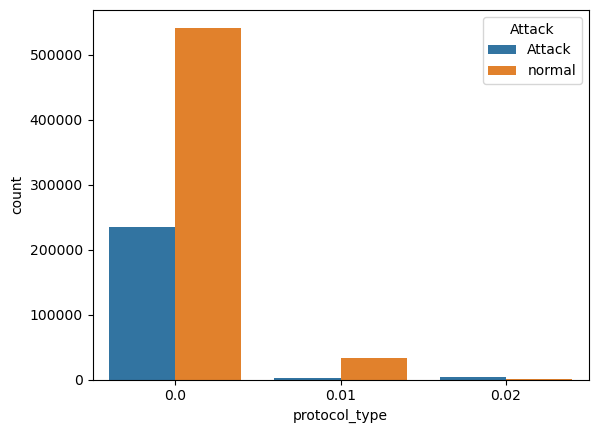

In [47]:
#Protocole type used in connection
sns.countplot( data = cat, x = 'protocol_type', hue= 'Attack')
#most of the attacks are on  protcol 0.0 

<Axes: xlabel='flag', ylabel='count'>

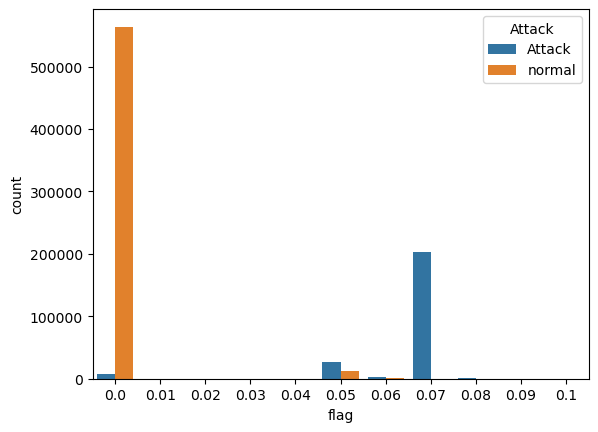

In [48]:
#flags are status of connection
#flag 7 have the most of the attacks followed by flag 5
sns.countplot(data = cat, x = 'flag', hue= 'Attack')

<Axes: xlabel='Attack', ylabel='count'>

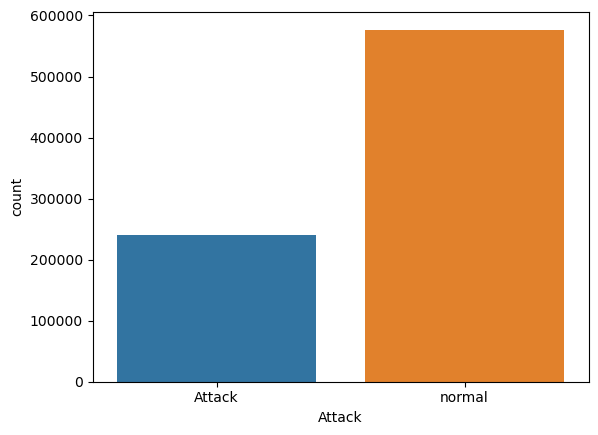

In [49]:
sns.countplot(data = cat, x= 'Attack')

In [50]:
'''sns.countplot(data = cat, x= 'Attack_type')
plt.xticks(rotation = 90)
plt.show()'''

"sns.countplot(data = cat, x= 'Attack_type')\nplt.xticks(rotation = 90)\nplt.show()"

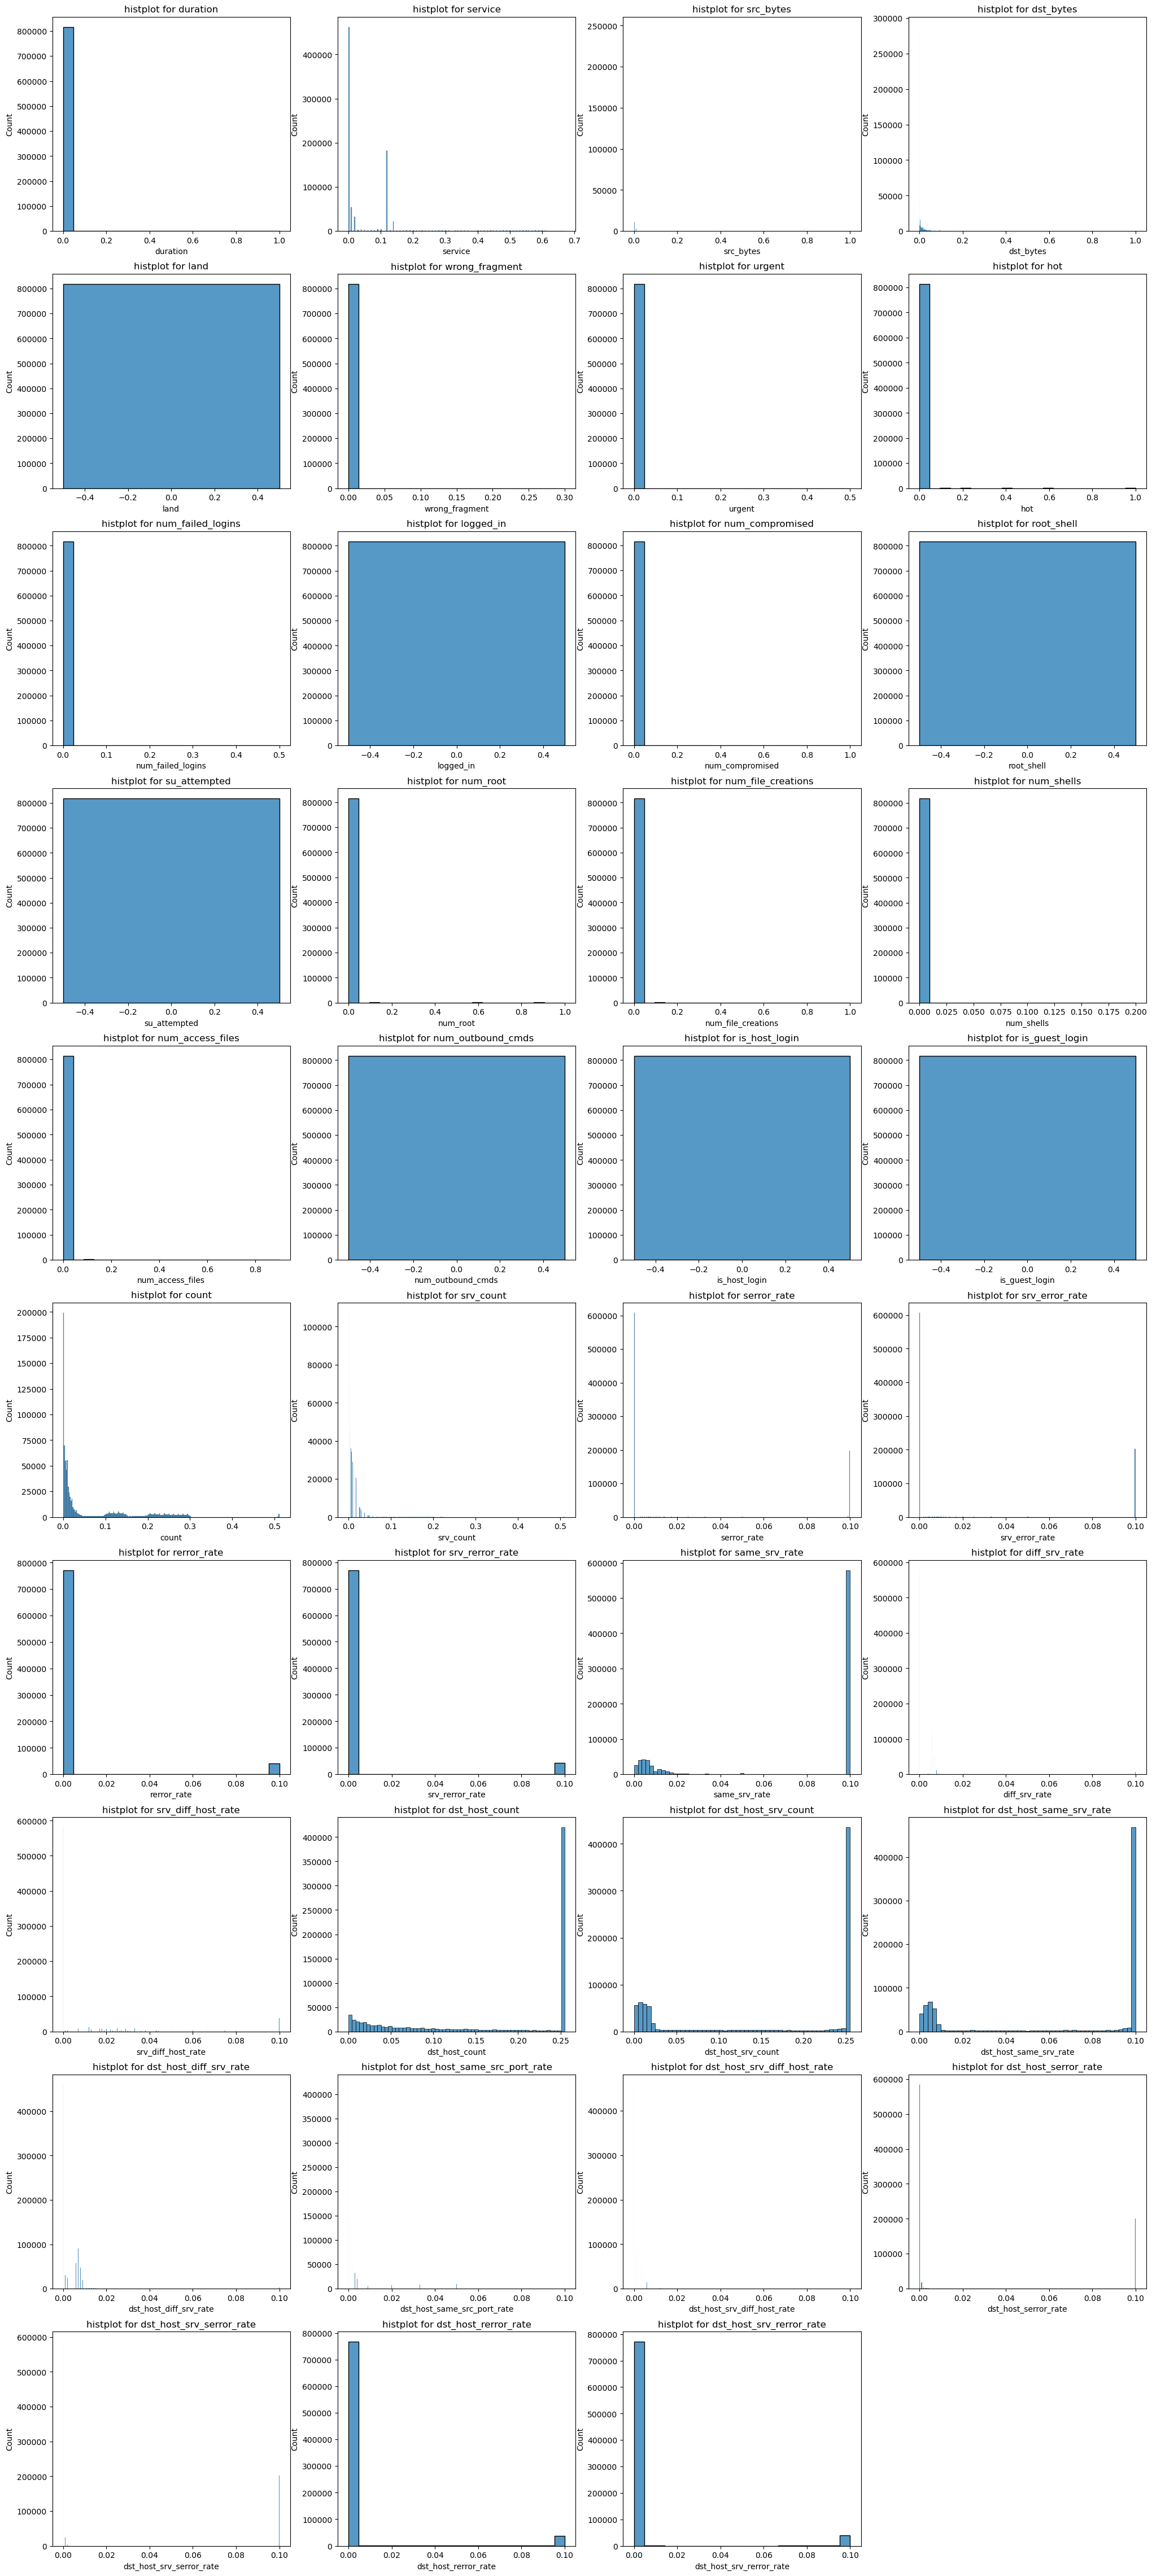

In [51]:
#hist plot to check the distribution 
plt.figure(figsize=(25,70))
n = 1
for col in cont.columns:
    plt.subplot(12,4,n)
    sns.histplot(cont[col])
    plt.title(f'histplot for {col}')
    n+=1
plt.show()    

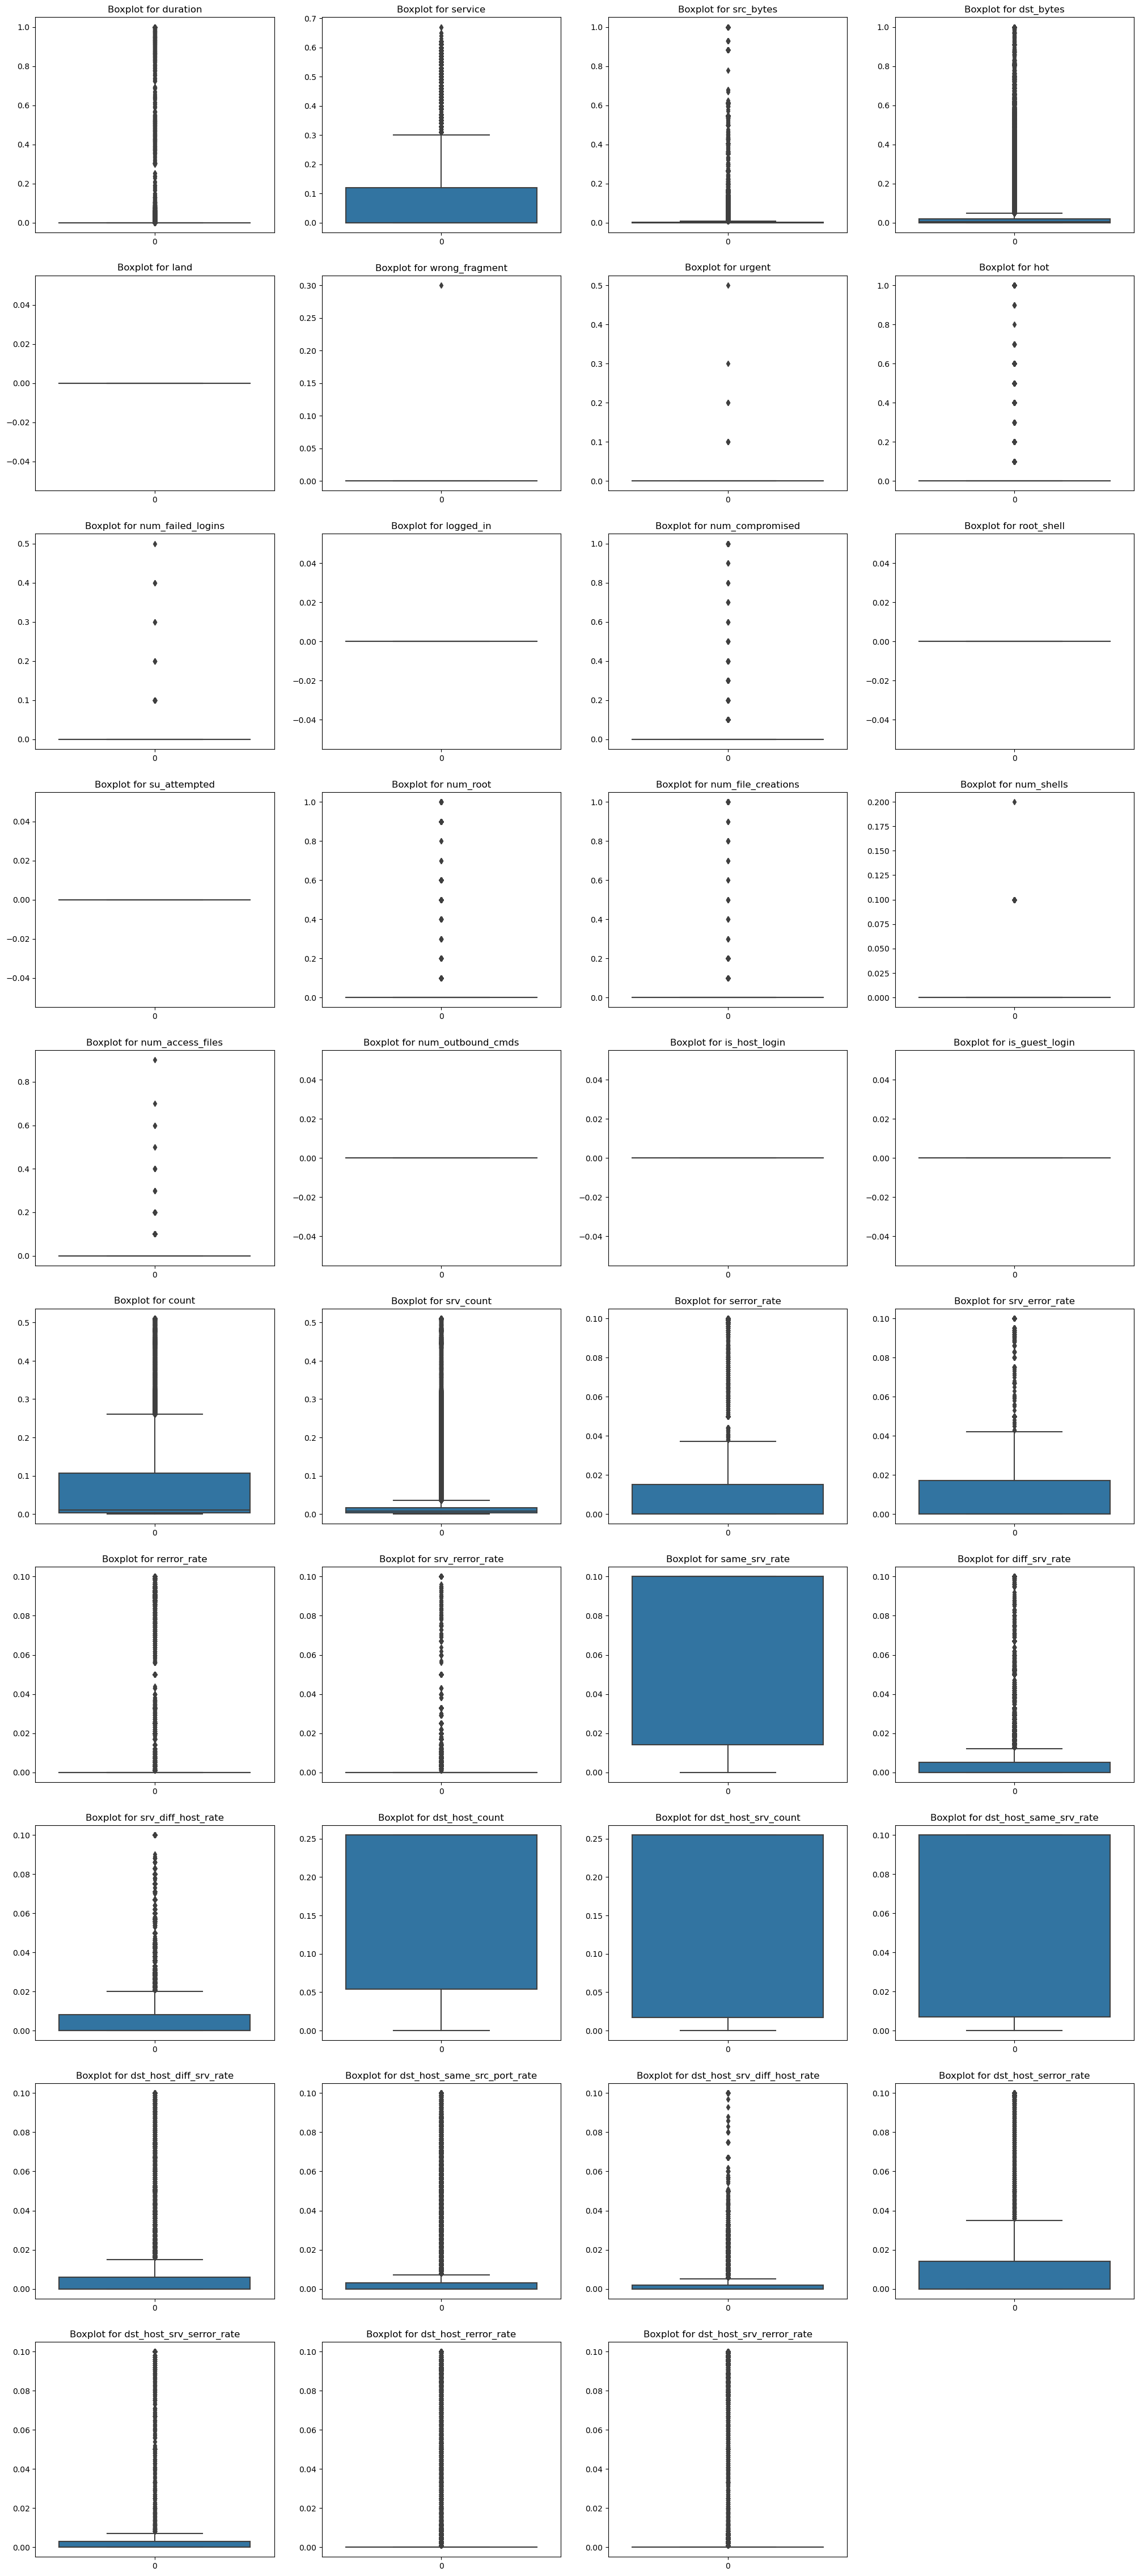

In [52]:
# boxplot to check from outliers in contineous variables 
plt.figure(figsize=(25,70))
n = 1
for col in cont.columns:
    plt.subplot(12,4,n)
    sns.boxplot(cont[col])
    plt.title(f'Boxplot for {col}')
    n+=1
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7060\3244952264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7060\3244952264.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

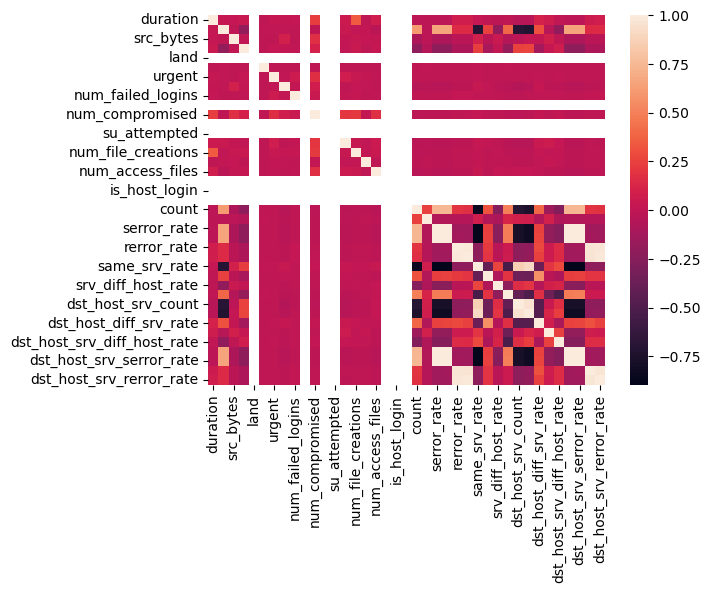

In [53]:
#Heatmap to check correlation
data.corr()
sns.heatmap(data.corr())

### Feature Engineering

<b>Outlier Treatment 

In [54]:
def outlier_treatment(x):
    if ((x.dtype == 'i')|(x.dtype == 'f')):
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.95))
    return x

In [55]:
data = data.apply(outlier_treatment)

<b>Feature elimination 

In [56]:
data.drop(columns= ['land','logged_in','root_shell','su_attempted','num_outbound_cmds','is_host_login','is_guest_login'], inplace = True)

In [57]:
data['Attack'] = data['Attack'].apply(lambda x: 0 if x=='normal' else 1)

In [58]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1


In [59]:
x = data.drop(columns = ['Attack'])
y = data['Attack']

<b>VIF

In [60]:
#using VIF to chek for multicolinearity 
vif = pd.DataFrame()
vif['Vif_Factor'] =[ variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['feature'] = x.columns

In [61]:
print(vif.sort_values(by = 'Vif_Factor', ascending = False))

    Vif_Factor                      feature
18  836.143648               srv_error_rate
17  722.051901                  serror_rate
31  706.729537     dst_host_srv_serror_rate
30  389.973678         dst_host_serror_rate
3   324.667668                         flag
19  112.541816                  rerror_rate
20   68.268215              srv_rerror_rate
26   61.625883       dst_host_same_srv_rate
21   36.706841                same_srv_rate
33   36.442497     dst_host_srv_rerror_rate
25   36.319763           dst_host_srv_count
32   25.756881         dst_host_rerror_rate
24    7.485486               dst_host_count
15    6.622420                        count
2     2.829169                      service
27    2.767181       dst_host_diff_srv_rate
16    2.329409                    srv_count
29    1.925429  dst_host_srv_diff_host_rate
22    1.879369                diff_srv_rate
1     1.823861                protocol_type
28    1.635785  dst_host_same_src_port_rate
23    1.358115           srv_dif

In [62]:
#droping values above 9 
vif = vif[vif['Vif_Factor']<9]

In [63]:
x = x[vif.feature]

In [64]:
x

,duration,protocol_type,service,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.00,0.00,0.00215,0.45076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.000,0.000,0.000,0.0
1,0.0,0.00,0.00,0.00162,0.04528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.001,0.000,0.100,0.0
2,0.0,0.00,0.00,0.00236,0.01228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.000,0.050,0.0
3,0.0,0.00,0.00,0.00233,0.02032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.003,0.000,0.033,0.0
4,0.0,0.00,0.00,0.00239,0.00486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.0,0.0,0.004,0.000,0.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251,0.251,0.0,0.0,0.255,0.001,0.098,0.0
817547,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252,0.252,0.0,0.0,0.255,0.001,0.099,0.0
817548,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253,0.253,0.0,0.0,0.255,0.001,0.099,0.0
817549,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254,0.254,0.0,0.0,0.255,0.001,0.100,0.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_7060\1503463860.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr())


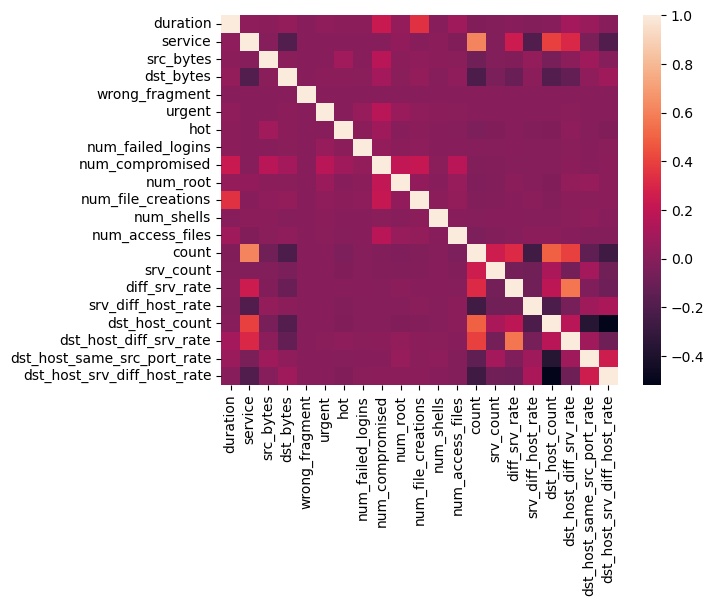

In [65]:
#heatmap to check for multicolinearity after VIF
sns.heatmap(x.corr())
plt.show()

<b>RFE 

In [66]:
#RFE to check for the variable importance with respect to target variable and removing leeat important features 
rf = RandomForestClassifier()
rfe = RFE(rf,n_features_to_select = 15,verbose=True)
#rfe = RFECV(rf,cv = 3, n_jobs= -1, verbose = True)
rfe.fit(x,y)
#print("Optimal number of features: %d"% rfe.n_features_)
print(x.columns[rfe.support_])

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Index(['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'hot',
       'num_compromised', 'count', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')


In [67]:
new_features = x.columns[rfe.support_]

In [68]:
#Using selectKbest to verify the important variables 
skb = SelectKBest(f_classif,k = 15)
skb.fit(x,y)
x.columns[skb.get_support()]
#the result set of selectKBest and RFE are same

Index(['protocol_type', 'service', 'src_bytes', 'dst_bytes', 'hot', 'num_root',
       'num_access_files', 'count', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [69]:
x = x[new_features]
x

,duration,protocol_type,service,src_bytes,dst_bytes,hot,num_compromised,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.0,0.00,0.00,0.00215,0.45076,0.0,0.0,0.001,0.001,0.0,0.0,0.000,0.000,0.000,0.0
1,0.0,0.00,0.00,0.00162,0.04528,0.0,0.0,0.002,0.002,0.0,0.0,0.001,0.000,0.100,0.0
2,0.0,0.00,0.00,0.00236,0.01228,0.0,0.0,0.001,0.001,0.0,0.0,0.002,0.000,0.050,0.0
3,0.0,0.00,0.00,0.00233,0.02032,0.0,0.0,0.002,0.002,0.0,0.0,0.003,0.000,0.033,0.0
4,0.0,0.00,0.00,0.00239,0.00486,0.0,0.0,0.003,0.003,0.0,0.0,0.004,0.000,0.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.251,0.251,0.0,0.0,0.255,0.001,0.098,0.0
817547,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.252,0.252,0.0,0.0,0.255,0.001,0.099,0.0
817548,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.253,0.253,0.0,0.0,0.255,0.001,0.099,0.0
817549,0.0,0.02,0.09,0.01032,0.00000,0.0,0.0,0.254,0.254,0.0,0.0,0.255,0.001,0.100,0.0


#### Train Test split

In [70]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state= 2, test_size=.3)

In [71]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(572273, 15)
(245260, 15)
(572273,)
(245260,)


In [72]:
#Cheking for class distribution in target variable 
train_y.value_counts(normalize= True)

0    0.705508
1    0.294492
Name: Attack, dtype: float64

In [73]:
train_data = pd.concat([train_x,train_y],axis= 1)
maj_class = train_data[train_data['Attack']==0]
min_class = train_data[train_data['Attack']==1]


In [74]:
downsample = resample(maj_class,
                          replace = True,
                          n_samples=len(min_class),
                          random_state= 5)

In [75]:
data_downsample = pd.concat([downsample,min_class])

In [76]:
train_x_d = data_downsample.drop(columns = ['Attack'])
train_y_d = data_downsample['Attack']

In [77]:
train_x_d

,duration,protocol_type,service,src_bytes,dst_bytes,hot,num_compromised,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
322486,0.0000,0.00,0.00,0.00227,0.05642,0.0,0.0,0.005,0.005,0.000,0.000,0.180,0.000,0.001,0.003
178949,0.0027,0.00,0.07,0.00897,0.02720,1.0,0.0,0.001,0.001,0.000,0.000,0.061,0.007,0.002,0.000
115378,0.0000,0.00,0.00,0.00179,0.03070,0.0,0.0,0.002,0.002,0.000,0.000,0.074,0.000,0.001,0.002
384464,0.0000,0.01,0.02,0.00046,0.00046,0.0,0.0,0.012,0.018,0.000,0.017,0.255,0.000,0.001,0.000
68132,0.0000,0.00,0.00,0.00212,0.01668,0.0,0.0,0.002,0.002,0.000,0.000,0.002,0.000,0.050,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768376,0.0000,0.00,0.19,0.00000,0.00000,0.0,0.0,0.289,0.013,0.005,0.000,0.255,0.005,0.000,0.000
645909,0.0000,0.00,0.12,0.00000,0.00000,0.0,0.0,0.199,0.019,0.006,0.000,0.255,0.007,0.000,0.000
707256,0.0000,0.00,0.04,0.00000,0.00000,0.0,0.0,0.015,0.005,0.033,0.040,0.255,0.004,0.002,0.000
727461,0.0000,0.00,0.12,0.00000,0.00000,0.0,0.0,0.100,0.020,0.005,0.000,0.255,0.006,0.000,0.000


In [78]:
train_y_d.value_counts()

1    168530
0    168530
Name: Attack, dtype: int64

### Model Training 

I will be using Recall as main evaluation matrix as I  want to choose a model which makes least prediction of a attack as normal

#### Logistic Regression 

In [79]:
lr  =LogisticRegression()
lr = lr.fit(train_x_d,train_y_d)

In [80]:
lr_train = lr.predict(train_x_d)
lr_test = lr.predict(test_x)

In [81]:
print('Accuracy of LR train data' ,metrics.accuracy_score(lr_train,train_y_d))
print('Accuracy of LR test data' ,metrics.accuracy_score(lr_test,test_y))

Accuracy of LR train data 0.9837714353527562
Accuracy of LR test data 0.9846856397292669


In [82]:
print('Recall of LR train data', metrics.recall_score(lr_train,train_y_d))
print('Recall of LR test data', metrics.recall_score(lr_test,test_y))

Recall of LR train data 0.9874272117465593
Recall of LR test data 0.9690467719423083


In [83]:
print('Confusion matrix of LR test data\n', metrics.confusion_matrix(lr_test,test_y))

Confusion matrix of LR test data
 [[170688   1494]
 [  2262  70816]]


#### KNN

In [84]:
std = StandardScaler()
train_std = std.fit_transform(train_x_d)
test_std = std.transform(test_x)

In [85]:
train_std = pd.DataFrame(train_std,columns = train_x_d.columns )
test_std = pd.DataFrame(test_std,columns = train_x_d.columns )

In [86]:
knn = KNeighborsClassifier()
knn = knn.fit(train_std,train_y_d)

In [87]:
'''knn_train = knn.predict(train_std)
knn_test = knn.predict(test_std)'''

'knn_train = knn.predict(train_std)\nknn_test = knn.predict(test_std)'

In [88]:
'''print('Accuracy of knn train data' ,metrics.accuracy_score(knn_train,train_y_d))
print('Accuracy of knn test data' ,metrics.accuracy_score(knn_test,test_y))'''

"print('Accuracy of knn train data' ,metrics.accuracy_score(knn_train,train_y_d))\nprint('Accuracy of knn test data' ,metrics.accuracy_score(knn_test,test_y))"

In [89]:
'''print('Recall of knn train data', metrics.recall_score(knn_train,train_y_d))
print('Recall of knn test data', metrics.recall_score(knn_test,test_y))'''

"print('Recall of knn train data', metrics.recall_score(knn_train,train_y_d))\nprint('Recall of knn test data', metrics.recall_score(knn_test,test_y))"

#### SVC

In [90]:
svc = SVC()
svc = svc.fit(train_std,train_y_d)

In [91]:
svc_train = svc.predict(train_std)
svc_test = svc.predict(test_std)

In [92]:
print('Accuracy of svc train data' ,metrics.accuracy_score(svc_train,train_y_d))
print('Accuracy of svc test data' ,metrics.accuracy_score(svc_test,test_y))

Accuracy of svc train data 0.9989497418857177
Accuracy of svc test data 0.9989806735709044


In [93]:
print('Recall of svc train data', metrics.recall_score(svc_train,train_y_d))
print('Recall of svc test data', metrics.recall_score(svc_test,test_y))

Recall of svc train data 0.9994535519125683
Recall of svc test data 0.9983540346897563


In [94]:
print('Confusion matrix of SVC test data\n', metrics.confusion_matrix(svc_test,test_y))

Confusion matrix of SVC test data
 [[172831    131]
 [   119  72179]]


#### GaussianNB

In [95]:
nb = GaussianNB()
nb = nb.fit(train_x_d,train_y_d)

In [96]:
nb_train = nb.predict(train_x_d)
nb_test = nb.predict(test_x)

In [97]:
print('Accuracy of NB train data' ,metrics.accuracy_score(nb_train,train_y_d))
print('Accuracy of NB test data' ,metrics.accuracy_score(nb_test,test_y))

Accuracy of NB train data 0.9385064973595205
Accuracy of NB test data 0.9180013047378293


In [98]:
print('Recall of NB train data', metrics.recall_score(nb_train,train_y_d))
print('Recall of NB test data', metrics.recall_score(nb_test,test_y))

Recall of NB train data 0.8992970569324451
Recall of NB test data 0.7881598268799753


In [99]:
print('Confusion matrix of NB test data\n', metrics.confusion_matrix(nb_test,test_y))

Confusion matrix of NB test data
 [[153763    924]
 [ 19187  71386]]


#### Decission Tree

In [100]:
dt = DecisionTreeClassifier()
dt = dt.fit(train_x_d,train_y_d)

In [101]:
dt_train = dt.predict(train_x_d)
dt_test = dt.predict(test_x)

In [102]:
print('Accuracy of DT train data' ,metrics.accuracy_score(dt_train,train_y_d))
print('Accuracy of DT test data' ,metrics.accuracy_score(dt_test,test_y))

Accuracy of DT train data 0.9999970331691687
Accuracy of DT test data 0.9996534290141075


In [103]:
print('Recall of DT train data', metrics.recall_score(dt_train,train_y_d))
print('Recall of DT test data', metrics.recall_score(dt_test,test_y))

Recall of DT train data 1.0
Recall of DT test data 0.9991568413341259


In [104]:
print('Confusion matrix of NB test data\n', metrics.confusion_matrix(dt_test,test_y))

Confusion matrix of NB test data
 [[172889     24]
 [    61  72286]]


#### Random Forest 

In [105]:
rf = RandomForestClassifier()
rf = rf.fit(train_x_d,train_y_d)

In [106]:
rf_train = rf.predict(train_x_d)
rf_test = rf.predict(test_x)

In [107]:
print('Accuracy of RF train data' ,metrics.accuracy_score(rf_train,train_y_d))
print('Accuracy of RF test data' ,metrics.accuracy_score(rf_test,test_y))

Accuracy of RF train data 0.9999970331691687
Accuracy of RF test data 0.9998328304656283


In [108]:
print('Recall of RF train data', metrics.recall_score(rf_train,train_y_d))
print('Recall of RF test data', metrics.recall_score(rf_test,test_y))

Recall of RF train data 1.0
Recall of RF test data 0.9996957670128469


In [109]:
print('Confusion matrix of RF test data\n', metrics.confusion_matrix(rf_test,test_y))

Confusion matrix of RF test data
 [[172928     19]
 [    22  72291]]


#### Gradient boosting

In [110]:
gb = GradientBoostingClassifier()
gb  = gb.fit(train_x_d,train_y_d)

In [111]:
gb_train = rf.predict(train_x_d)
gb_test = rf.predict(test_x)

In [112]:
print('Accuracy of GB train data' ,metrics.accuracy_score(gb_train,train_y_d))
print('Accuracy of GB test data' ,metrics.accuracy_score(gb_test,test_y))

Accuracy of GB train data 0.9999970331691687
Accuracy of GB test data 0.9998328304656283


In [113]:
print('Recall of GB train data', metrics.recall_score(gb_train,train_y_d))
print('Recall of GB test data', metrics.recall_score(gb_test,test_y))

Recall of GB train data 1.0
Recall of GB test data 0.9996957670128469


In [114]:
print('Confusion matrix of GB test data\n', metrics.confusion_matrix(gb_test,test_y))

Confusion matrix of GB test data
 [[172928     19]
 [    22  72291]]


#### XGBOOST

In [115]:
xg = XGBClassifier(enable_categorical=True)
xg = xg.fit(train_x_d,train_y_d)

In [116]:
xg_train = rf.predict(train_x_d)
xg_test = rf.predict(test_x)

In [117]:
print('Accuracy of XGB train data' ,metrics.accuracy_score(xg_train,train_y_d))
print('Accuracy of XGB test data' ,metrics.accuracy_score(xg_test,test_y))

Accuracy of XGB train data 0.9999970331691687
Accuracy of XGB test data 0.9998328304656283


In [118]:
print('Recall of XGB train data', metrics.recall_score(xg_train,train_y_d))
print('Recall of XGB test data', metrics.recall_score(xg_test,test_y))

Recall of XGB train data 1.0
Recall of XGB test data 0.9996957670128469


In [119]:
print('Confusion matrix of XGB test data\n', metrics.confusion_matrix(xg_test,test_y))

Confusion matrix of XGB test data
 [[172928     19]
 [    22  72291]]


In [120]:
prediction = pd.DataFrame({'actual':test_y,'predicted':xg_test})

In [121]:
prediction

,actual,predicted
164113,0,0
707650,1,1
643647,1,1
663912,1,1
512194,0,0
...,...,...
329240,0,0
119232,0,0
757801,1,1
649619,1,1


In [182]:
pred  = prediction.to_excel("D:/A-Labs/ML/assignmnets/Cyber Security Case Study/file1.xlsx")


## Multinomial Classification

In [123]:
normal['Attack_type'] = 'no_attack'
back['Attack_type'] = 'Back'
buffer['Attack_type'] = 'Buffer Overflow'
FTP['Attack_type'] = 'FTP writer'
passw['Attack_type'] = 'Guess Password'
nept['Attack_type'] = 'Neptune'
nmap['Attack_type'] = 'NMap'
port['Attack_type'] = 'Port sweep'
root['Attack_type'] = 'Rootkit'
satan['Attack_type'] = 'Satan'
smurf['Attack_type'] ='Smurf' 


In [124]:
multi  = pd.concat([normal,back,buffer,FTP,passw,nept,nmap,port,root,satan,smurf])

In [125]:
multi

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack,Attack_type
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,normal,no_attack
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,normal,no_attack
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,normal,no_attack
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,normal,no_attack
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,normal,no_attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Attack,Smurf
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack,Smurf
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Attack,Smurf
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Attack,Smurf


In [126]:
multi.drop(columns= 'Attack', inplace = True)

In [127]:
multi = multi.reset_index(drop= True)
multi

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_type
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,no_attack
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,no_attack
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,no_attack
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,no_attack
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,no_attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Smurf
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Smurf


In [128]:
multi.columns = multi.columns.str.replace(' ','')

In [129]:
# Nominal features
nominal_features = ['protocol_type', 'flag','Attack_type']
multi[nominal_features] = multi[nominal_features].astype('category')

# Binary features
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
multi[binary_features] = multi[binary_features].astype('int')

# Numeric features
numeric_features = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
                    'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations',
                    'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count',
                    'serror_rate', 'srv_error_rate', 'rerror_rate', 'srv_rerror_rate',
                    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                    'dst_host_srv_rerror_rate']

multi[numeric_features] = multi[numeric_features].astype('float')  # You can choose the appropriate numeric type


In [130]:
multi.drop_duplicates(inplace= True)

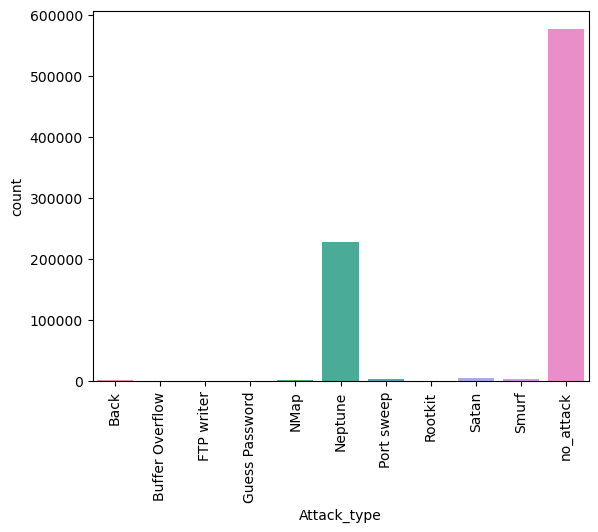

In [131]:
sns.countplot(data = multi, x= 'Attack_type')
plt.xticks(rotation = 90)
plt.show()
#neptune are the majority attacks

In [132]:
def outlier_treatment(x):
    if ((x.dtype == 'i')|(x.dtype == 'f')):
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.95))
    return x

In [133]:
multi = multi.apply(outlier_treatment)

In [134]:
multi.drop(columns= ['land','logged_in','root_shell','su_attempted','num_outbound_cmds','is_host_login','is_guest_login'], inplace = True)

In [135]:

numeric_class = {'no_attack':0,
            'Back':1,
            'Buffer Overflow':2,
            'FTP writer':3,
            'Guess Password':4,
            'Neptune':5,
            'NMap':6,
            'Port sweep':7,
            'Rootkit':8,
            'Satan':9,
            'Smurf':10}

In [136]:
multi['Attack_type'] = multi['Attack_type'].map(numeric_class)

In [137]:
multi

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_type
0,0.0,0.00,0.00,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.00,0.00,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.00,0.00,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.00,0.00,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.00,0.00,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817546,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251,0.251,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,10
817547,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252,0.252,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
817548,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253,0.253,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,10
817549,0.0,0.02,0.09,0.0,0.01032,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254,0.254,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,10


In [138]:
x_m = multi[new_features]

In [139]:
y_m = multi['Attack_type']

In [140]:
y_m.value_counts()

0     576693
5     227228
9       5019
10      3007
7       2964
6       1554
1        968
4         53
2         30
8         10
3          8
Name: Attack_type, dtype: int64

In [141]:
#Define SMOTE-Tomek Links to upsamle the minority class
resampler = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resampler.fit_resample(x_m, y_m)

In [142]:
y.value_counts()

1     576693
2     576693
3     576693
4     576693
6     576693
5     576693
7     576693
8     576693
9     576693
10    576693
0     576689
Name: Attack_type, dtype: int64

In [143]:
train_x, test_x,train_y,test_y = train_test_split(x_m,y_m,random_state=10, train_size=.3)

In [144]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(245260, 15)
(245260,)
(572274, 15)
(572274,)


### Model Training 

#### Logistic Regression

In [145]:
lr  =LogisticRegression()
lr = lr.fit(train_x,train_y)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
lr_train = lr.predict(train_x)
lr_test = lr.predict(test_x)

In [147]:
print('Accuracy of LR train data' ,metrics.accuracy_score(lr_train,train_y))
print('Accuracy of LR test data' ,metrics.accuracy_score(lr_test,test_y))

Accuracy of LR train data 0.9857579711326755
Accuracy of LR test data 0.985681683948598


In [148]:
print('Recall of LR train data', metrics.recall_score(lr_train,train_y, average = 'micro'))
print('Recall of LR test data', metrics.recall_score(lr_test,test_y, average = 'micro'))

Recall of LR train data 0.9857579711326755
Recall of LR test data 0.985681683948598


#### Standardization

In [149]:
std = StandardScaler()
train_std = std.fit_transform(train_x)
test_std = std.transform(test_x)

In [150]:
train_std = pd.DataFrame(train_std,columns = train_x.columns )
test_std = pd.DataFrame(test_std,columns = train_x.columns )

#### SVC

In [151]:
svc = SVC()
svc = svc.fit(train_std,train_y)

In [152]:
svc_train = svc.predict(train_std)
svc_test = svc.predict(test_std)

In [153]:
print('Accuracy of svc train data' ,metrics.accuracy_score(svc_train,train_y))
print('Accuracy of svc test data' ,metrics.accuracy_score(svc_test,test_y))

Accuracy of svc train data 0.9987034167821903
Accuracy of svc test data 0.998455285405243


In [154]:
print('Recall of svc train data', metrics.recall_score(svc_train,train_y, average = 'micro'))
print('Recall of svc test data', metrics.recall_score(svc_test,test_y, average = 'micro'))

Recall of svc train data 0.9987034167821903
Recall of svc test data 0.998455285405243


#### GaussianNB

In [156]:
nb = GaussianNB()
nb = nb.fit(train_x,train_y)

In [157]:
nb_train = nb.predict(train_x)
nb_test = nb.predict(test_x)

In [158]:
print('Accuracy of NB train data' ,metrics.accuracy_score(nb_train,train_y))
print('Accuracy of NB test data' ,metrics.accuracy_score(nb_test,test_y))

Accuracy of NB train data 0.8731835603033515
Accuracy of NB test data 0.8733124342535219


In [159]:
print('Recall of NB train data', metrics.recall_score(nb_train,train_y, average = 'micro'))
print('Recall of NB test data', metrics.recall_score(nb_test,test_y, average = 'micro'))

Recall of NB train data 0.8731835603033515
Recall of NB test data 0.8733124342535219


#### Decission Tree

In [160]:
dt = DecisionTreeClassifier()
dt = dt.fit(train_x,train_y)

In [161]:
dt_train = dt.predict(train_x)
dt_test = dt.predict(test_x)

In [162]:
print('Accuracy of DT train data' ,metrics.accuracy_score(dt_train,train_y))
print('Accuracy of DT test data' ,metrics.accuracy_score(dt_test,test_y))

Accuracy of DT train data 0.9999796134714181
Accuracy of DT test data 0.9995806204720117


In [163]:
print('Recall of DT train data', metrics.recall_score(dt_train,train_y, average = 'micro'))
print('Recall of DT test data', metrics.recall_score(dt_test,test_y, average = 'micro'))

Recall of DT train data 0.9999796134714181
Recall of DT test data 0.9995806204720117


#### Random Forest 

In [164]:
rf = RandomForestClassifier()
rf = rf.fit(train_x,train_y)

In [165]:
rf_train = rf.predict(train_x)
rf_test = rf.predict(test_x)

In [166]:
print('Accuracy of RF train data' ,metrics.accuracy_score(rf_train,train_y))
print('Accuracy of RF test data' ,metrics.accuracy_score(rf_test,test_y))

Accuracy of RF train data 0.9999796134714181
Accuracy of RF test data 0.9996312954983102


In [167]:
print('Recall of RF train data', metrics.recall_score(rf_train,train_y, average = 'micro'))
print('Recall of RF test data', metrics.recall_score(rf_test,test_y, average = 'micro'))

Recall of RF train data 0.9999796134714181
Recall of RF test data 0.9996312954983102


#### Gradient boosting

In [168]:
gb = GradientBoostingClassifier()
gb  = gb.fit(train_x,train_y)

In [169]:
gb_train = rf.predict(train_x)
gb_test = rf.predict(test_x)

In [170]:
print('Accuracy of GB train data' ,metrics.accuracy_score(gb_train,train_y))
print('Accuracy of GB test data' ,metrics.accuracy_score(gb_test,test_y))

Accuracy of GB train data 0.9999796134714181
Accuracy of GB test data 0.9996312954983102


In [171]:
print('Recall of GB train data', metrics.recall_score(gb_train,train_y, average = 'micro'))
print('Recall of GB test data', metrics.recall_score(gb_test,test_y, average = 'micro'))

Recall of GB train data 0.9999796134714181
Recall of GB test data 0.9996312954983102


#### XGBOOST

In [172]:
xg = XGBClassifier(enable_categorical=True)
xg = xg.fit(train_x,train_y)

In [173]:
xg_train = rf.predict(train_x)
xg_test = rf.predict(test_x)

In [174]:
print('Accuracy of XGB train data' ,metrics.accuracy_score(xg_train,train_y))
print('Accuracy of XGB test data' ,metrics.accuracy_score(xg_test,test_y))

Accuracy of XGB train data 0.9999796134714181
Accuracy of XGB test data 0.9996312954983102


In [175]:
print('Recall of XGB train data', metrics.recall_score(xg_train,train_y, average = 'micro'))
print('Recall of XGB test data', metrics.recall_score(xg_test,test_y, average = 'micro'))

Recall of XGB train data 0.9999796134714181
Recall of XGB test data 0.9996312954983102


<Axes: >

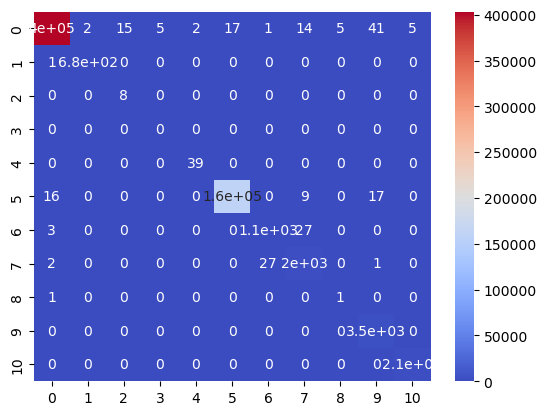

In [176]:
sns.heatmap(confusion_matrix(xg_test,test_y),annot=True,cmap='coolwarm')

In [179]:
multiclass_prediction = pd.DataFrame({'actual':test_y,'predicted':xg_test})

In [180]:
multiclass_prediction

,actual,predicted
214475,0,0
521663,0,0
16229,0,0
685099,5,5
242528,0,0
...,...,...
497981,0,0
729417,5,5
210555,0,0
160449,0,0


In [183]:
multiclass_pred  = multiclass_prediction.to_excel("D:/A-Labs/ML/assignmnets/Cyber Security Case Study/multiclass.xlsx")